# Decision Tree Classification (Iris Dataset)

## Load data

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [149]:
from sklearn import datasets
iris = datasets.load_iris()

In [41]:
type(iris)

sklearn.utils.Bunch

In [42]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [54]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [67]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [43]:
type(iris.data)

numpy.ndarray

In [45]:
iris.data.shape

(150, 4)

In [46]:
type(iris.target)

numpy.ndarray

In [47]:
iris.target.shape

(150,)

In [48]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [154]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Visualization

In [166]:
df_x=pd.DataFrame(iris.data, columns = iris.feature_names)
df_y = pd.DataFrame(iris.target, columns=['Species'])

In [167]:
df = pd.concat([df_x,df_y], axis=1)

In [168]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


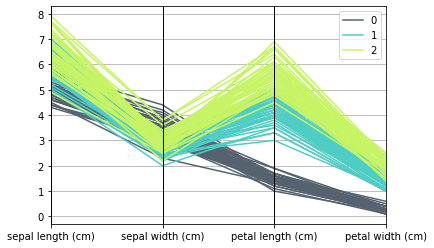

In [169]:
pd.plotting.parallel_coordinates(df, 'Species', color=('#556270', '#4ECDC4', '#C7F464'))

## X-Y Preparation

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3, random_state = 48)

In [50]:
x_train.shape

(105, 4)

In [51]:
y_train.shape

(105,)

## Modelling

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = "gini", max_depth=10, 
                             min_samples_split=10, min_samples_leaf=5, 
                             random_state=48)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=48)

### Model Interpretation

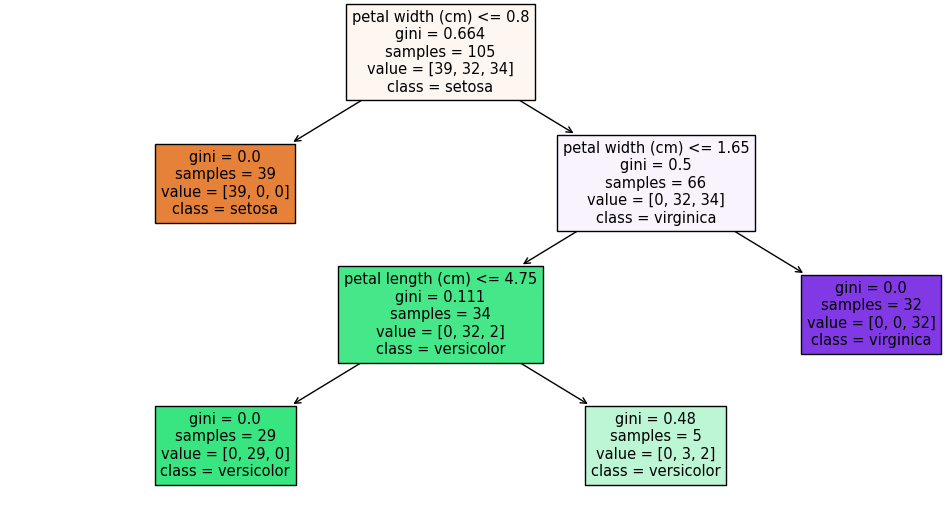

In [68]:
from sklearn.tree import plot_tree
plt.figure(figsize = (10, 5), dpi = 100)
plot_tree(dtc, feature_names = iris.feature_names, class_names = ['setosa', 'versicolor', 'virginica'], filled = True)
plt.show()

In [55]:
for i, j in zip(iris.feature_names, dtc.feature_importances_):
    print((i + ":").ljust(13), round(j, 4))

sepal length (cm): 0.0
sepal width (cm): 0.0
petal length (cm): 0.0203
petal width (cm): 0.9797


### Model Evaluation

In [60]:
from sklearn.metrics import accuracy_score

In [63]:
y_hat_train = dtc.predict(x_train)
y_hat_test = dtc.predict(x_test)

In [64]:
print('Performance on Training Data')
print('  + accuracy: %.2f' % accuracy_score(y_train, y_hat_train))
print('Performance on Testing Data')
print('  + accuracy: %.2f' % accuracy_score(y_test, y_hat_test))

Performance on Training Data
  + accuracy: 0.98
Performance on Testing Data
  + accuracy: 0.91


In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
confusion_matrix(y_test, y_hat_test)

array([[11,  0,  0],
       [ 0, 16,  2],
       [ 0,  2, 14]])

## Modelling (with Cost-Complexity Pruning)

In [92]:
dtc = DecisionTreeClassifier(criterion = "gini", random_state=48)
path = dtc.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [99]:
ccp_alphas[:]

array([0.        , 0.01269841, 0.02315593, 0.27814277, 0.35031128])

In [98]:
impurities[:]

array([0.        , 0.01269841, 0.03585434, 0.31399711, 0.66430839])

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

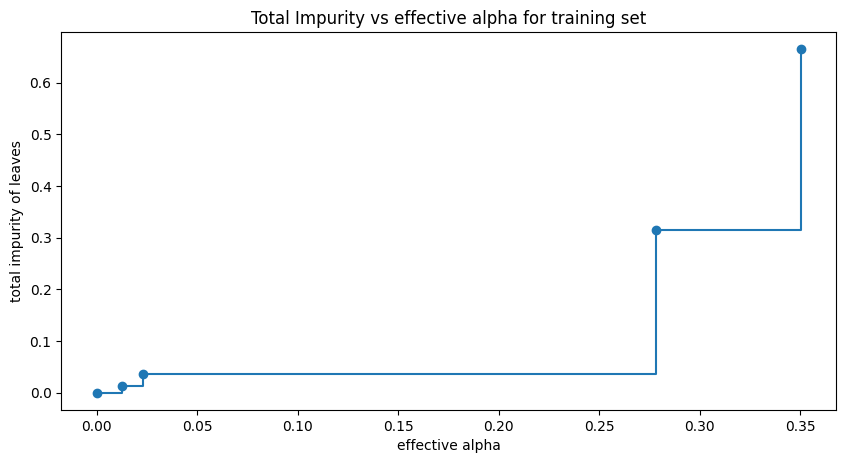

In [95]:
fig, ax = plt.subplots(figsize = (10, 5), dpi = 100)
ax.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha"); ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [100]:
from sklearn.model_selection import GridSearchCV
ccp_alphas = ccp_alphas[:-1]
parameters = {'ccp_alpha':ccp_alphas}
dtc = DecisionTreeClassifier(random_state=48)
dtc_cv = GridSearchCV(dtc, param_grid = parameters, refit = True, cv = 5)
dtc_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=48),
             param_grid={'ccp_alpha': array([0.        , 0.01269841, 0.02315593, 0.27814277])})

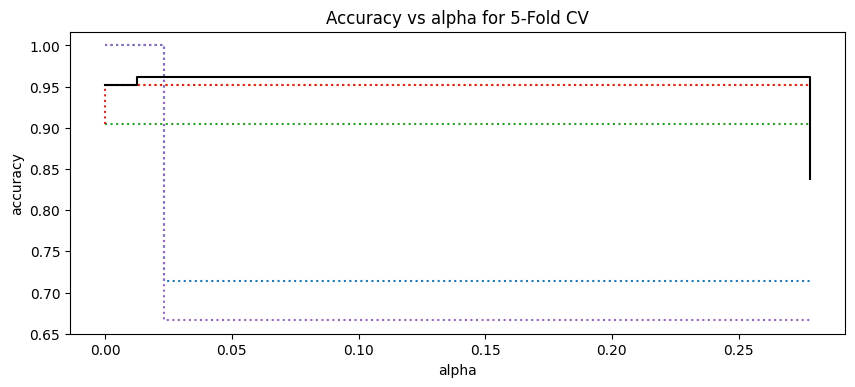

In [101]:
fig, ax = plt.subplots(figsize = (10, 4), dpi = 100)
ax.set_xlabel("alpha"); ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for 5-Fold CV")
for i in range(5):
    name_fold = "split" + str(i) + "_test_score"
    ax.plot(ccp_alphas, dtc_cv.cv_results_[name_fold], 
            linestyle=':', drawstyle='steps')
ax.plot(ccp_alphas, dtc_cv.cv_results_['mean_test_score'], 
        "k", drawstyle="steps-post", linewidth = 1.5)
plt.show()

In [102]:
dtc_cv.best_params_

{'ccp_alpha': 0.012698412698412698}

In [103]:
dtc_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.012698412698412698, random_state=48)

### Model Interpretation

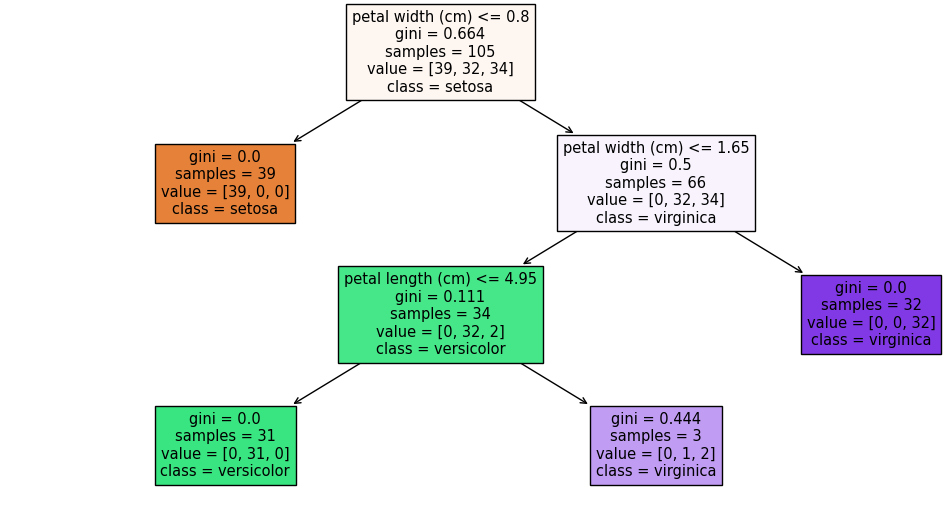

In [104]:
from sklearn.tree import plot_tree
plt.figure(figsize = (10, 5), dpi = 100)
plot_tree(dtc_cv.best_estimator_, feature_names = iris.feature_names, class_names = ['setosa', 'versicolor', 'virginica'], filled = True)
plt.show()

In [105]:
for i, j in zip(iris.feature_names, dtc_cv.best_estimator_.feature_importances_):
    print((i + ":").ljust(13), round(j, 4))

sepal length (cm): 0.0
sepal width (cm): 0.0
petal length (cm): 0.0355
petal width (cm): 0.9645


### Model Evaluation

In [86]:
from sklearn.metrics import accuracy_score

In [88]:
y_hat_train = dtc_cv.best_estimator_.predict(x_train)
y_hat_test = dtc_cv.best_estimator_.predict(x_test)

In [89]:
print('Performance on Training Data')
print('  + accuracy: %.2f' % accuracy_score(y_train, y_hat_train))
print('Performance on Testing Data')
print('  + accuracy: %.2f' % accuracy_score(y_test, y_hat_test))

Performance on Training Data
  + accuracy: 0.98
Performance on Testing Data
  + accuracy: 0.91


In [90]:
from sklearn.metrics import confusion_matrix

In [91]:
confusion_matrix(y_test, y_hat_test)

array([[11,  0,  0],
       [ 0, 16,  2],
       [ 0,  2, 14]])

# Random Forest Classification (Iris Dataset)

## Load data

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [107]:
from sklearn import datasets
iris = datasets.load_iris()

In [108]:
type(iris)

sklearn.utils.Bunch

In [109]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [110]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [111]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [112]:
type(iris.data)

numpy.ndarray

In [113]:
iris.data.shape

(150, 4)

In [114]:
type(iris.target)

numpy.ndarray

In [115]:
iris.target.shape

(150,)

In [116]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Visualization

In [ ]:
df_x=pd.DataFrame(iris.data, columns = iris.feature_names)
df_y = pd.DataFrame(iris.target, columns=['Species'])

In [ ]:
df = pd.concat([df_x,df_y], axis=1)

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


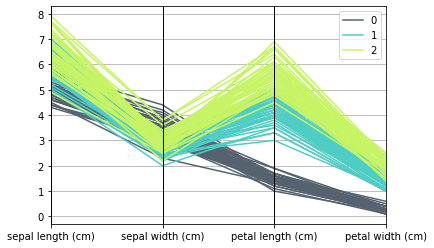

In [ ]:
pd.plotting.parallel_coordinates(df, 'Species', color=('#556270', '#4ECDC4', '#C7F464'))

## X-Y Preparation

In [117]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3, random_state = 48)

In [118]:
x_train.shape

(105, 4)

In [119]:
y_train.shape

(105,)

## Modelling

In [134]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='gini', max_depth = 6, 
                             n_estimators = 200, max_features = "auto",
                             random_state = 48)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=200, random_state=48)

### Model Interpretation

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


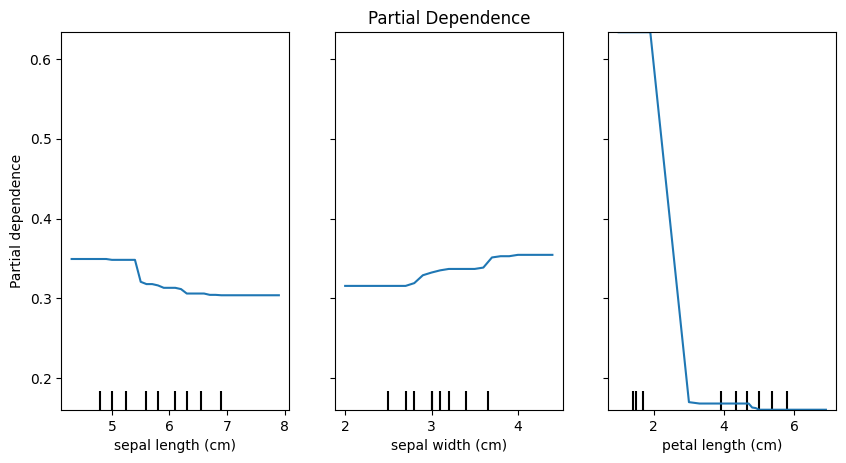

In [147]:
from sklearn.inspection import plot_partial_dependence
fig, ax = plt.subplots(figsize=(10, 5), dpi = 100)
ax.set_title("Partial Dependence")
plot_partial_dependence(estimator = rfc, X = iris.data, ax = ax,
                        features = [0, 1, 2], feature_names = iris.feature_names[:3],
                        target = 0)

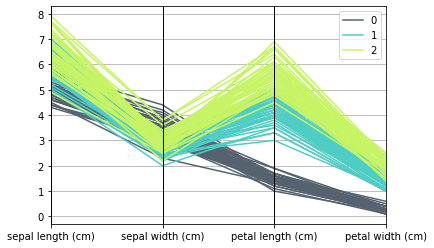

In [ ]:
pd.plotting.parallel_coordinates(df, 'Species', color=('#556270', '#4ECDC4', '#C7F464'))

In [143]:
for i, j in zip(iris.feature_names, rfc.feature_importances_):
    print((i + ":").ljust(13), round(j, 4))

sepal length (cm): 0.0777
sepal width (cm): 0.0279
petal length (cm): 0.4225
petal width (cm): 0.4719


### Model Evaluation

In [121]:
from sklearn.metrics import accuracy_score

In [123]:
y_hat_train = rfc.predict(x_train)
y_hat_test = rfc.predict(x_test)

In [124]:
print('Performance on Training Data')
print('  + accuracy: %.2f' % accuracy_score(y_train, y_hat_train))
print('Performance on Testing Data')
print('  + accuracy: %.2f' % accuracy_score(y_test, y_hat_test))

Performance on Training Data
  + accuracy: 1.00
Performance on Testing Data
  + accuracy: 0.93


In [125]:
from sklearn.metrics import confusion_matrix

In [126]:
confusion_matrix(y_test, y_hat_test)

array([[11,  0,  0],
       [ 0, 16,  2],
       [ 0,  1, 15]])